# Home Work №1
Вам предстоит поработать с данными, описывающими биомеханические особенности ортопедических больных. Везде, где требуется написать свой код или ответ, помечено %%

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import scale
from sklearn.decomposition import PCA

In [2]:
# Оставим вывод только двух чисел после запятой
pd.set_option('precision', 2)

## Шаг 1: Знакомство с таблицей

In [3]:
# Загрузим данные из файла column_2C_weka.csv
data = pd.read_csv("C:/Users/j.smolkina/OneDrive - CRITEO/Desktop/HSE/analys data in bio попцова/HW/column_2C_weka.csv")
data.head()

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,jump_height,class
0,63.03,22.55,39.61,40.48,98.67,-0.25,34.56,Abnormal
1,49.71,9.65,28.32,40.06,108.17,7.92,10.03,Abnormal
2,NaN,13.92,25.12,26.33,130.33,2.23,NaN,Abnormal
3,53.43,15.86,37.17,37.57,120.57,5.99,31.68,Abnormal
4,44.32,12.54,36.10,31.78,124.12,5.42,NaN,Abnormal


In [4]:
# Какой размер таблицы?
print(data.shape)

(225, 8)


In [5]:
# Какие есть признаки в таблице? 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 225 entries, 0 to 224
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   pelvic_incidence          222 non-null    float64
 1   pelvic_tilt numeric       222 non-null    float64
 2   lumbar_lordosis_angle     223 non-null    float64
 3   sacral_slope              222 non-null    float64
 4   pelvic_radius             222 non-null    float64
 5   degree_spondylolisthesis  222 non-null    float64
 6   jump_height               19 non-null     float64
 7   class                     225 non-null    object 
dtypes: float64(7), object(1)
memory usage: 14.2+ KB


In [6]:
# Посмотрим первые несколько строк таблицы
data[0:5][:] # we watch first 5 rows from 0 to 4 and all columns

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,jump_height,class
0,63.03,22.55,39.61,40.48,98.67,-0.25,34.56,Abnormal
1,49.71,9.65,28.32,40.06,108.17,7.92,10.03,Abnormal
2,NaN,13.92,25.12,26.33,130.33,2.23,NaN,Abnormal
3,53.43,15.86,37.17,37.57,120.57,5.99,31.68,Abnormal
4,44.32,12.54,36.10,31.78,124.12,5.42,NaN,Abnormal


In [7]:
#Индивидуальный набор samplов размера 200, над которым будет проводиться дальнейшая работа
sample = data.sample(n=200)

## Шаг 2: Изучение на наличие нулевых значений

In [8]:
#Посмотрим на содержание данных относительно ненулевых значений
data[data[:].isnull()] # we chack all columns and rows for containing NaN

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,jump_height,class
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
220,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
221,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
222,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
223,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
data[data['pelvic_incidence'].isnull()]


,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,jump_height,class
2,NaN,13.92,25.12,26.33,130.33,2.23,NaN,Abnormal
27,NaN,20.10,44.00,35.42,122.65,34.55,NaN,Abnormal
76,NaN,3.97,58.34,44.06,125.35,35.00,NaN,Abnormal


In [10]:
data[data['pelvic_tilt numeric'].isnull()]


,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,jump_height,class
12,45.54,NaN,30.30,32.47,117.98,-4.99,27.47,Abnormal
31,77.11,NaN,69.48,46.64,112.15,70.76,NaN,Abnormal
88,115.92,NaN,76.80,78.41,104.70,81.20,NaN,Abnormal


In [11]:
data[data['lumbar_lordosis_angle'].isnull()]


,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,jump_height,class
34,44.91,10.22,NaN,34.7,130.08,37.36,NaN,Abnormal
107,75.44,31.54,NaN,43.9,106.83,54.97,NaN,Abnormal


In [12]:
data[data['sacral_slope'].isnull()]


,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,jump_height,class
6,31.28,3.14,32.56,NaN,129.01,3.62,NaN,Abnormal
45,49.78,6.47,53.00,NaN,110.86,25.34,9.12,Abnormal
139,89.83,22.64,90.56,NaN,100.50,3.04,NaN,Normal


In [13]:
data[data['pelvic_radius'].isnull()]

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,jump_height,class
15,35.49,11.70,15.59,23.79,NaN,-3.46,NaN,Abnormal
55,54.74,12.10,41.00,42.65,NaN,40.38,NaN,Abnormal
180,48.17,9.59,39.71,38.58,NaN,5.36,NaN,Normal


In [14]:
data[data['degree_spondylolisthesis'].isnull()]

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,jump_height,class
19,50.21,29.76,36.10,20.45,128.29,NaN,NaN,Abnormal
67,85.29,18.28,100.74,67.01,110.66,NaN,NaN,Abnormal
217,54.60,21.49,29.36,33.11,118.34,NaN,NaN,Normal


In [15]:
data[data['jump_height'].isnull()]
# has the biggest number of Nan rows

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,jump_height,class
2,NaN,13.92,25.12,26.33,130.33,2.23,NaN,Abnormal
4,44.32,12.54,36.10,31.78,124.12,5.42,NaN,Abnormal
5,63.83,20.36,54.55,43.47,112.31,-0.62,NaN,Abnormal
6,31.28,3.14,32.56,NaN,129.01,3.62,NaN,Abnormal
7,38.70,13.44,31.00,25.25,123.16,1.43,NaN,Abnormal
...,...,...,...,...,...,...,...,...
219,45.08,12.31,44.58,32.77,147.89,-8.94,NaN,Normal
221,53.94,20.72,29.22,33.22,114.37,-0.42,NaN,Normal
222,61.45,22.69,46.17,38.75,125.67,-2.71,NaN,Normal
223,45.25,8.69,41.58,36.56,118.55,0.21,NaN,Normal


In [16]:
data[data['class'].isnull()]

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,jump_height,class


In [17]:
# Какой столбец сильно выделяется?
# Ответ:'jump_height'

In [18]:
#Посмотрим на первые несколько строк, где этот столбец is null
data[0:20][data['jump_height'].isnull()]

<ipython-input-18-2d2064ecb3e1>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data[0:20][data['jump_height'].isnull()]


,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,jump_height,class
2,NaN,13.92,25.12,26.33,130.33,2.23,NaN,Abnormal
4,44.32,12.54,36.10,31.78,124.12,5.42,NaN,Abnormal
5,63.83,20.36,54.55,43.47,112.31,-0.62,NaN,Abnormal
6,31.28,3.14,32.56,NaN,129.01,3.62,NaN,Abnormal
7,38.70,13.44,31.00,25.25,123.16,1.43,NaN,Abnormal
9,43.92,14.18,37.83,29.74,134.46,6.45,NaN,Abnormal
10,54.92,21.06,42.20,33.86,125.21,2.43,NaN,Abnormal
11,63.07,24.41,54.00,38.66,106.42,15.78,NaN,Abnormal
13,36.13,22.76,29.00,13.37,115.58,-3.24,NaN,Abnormal
14,52.42,19.01,35.87,33.41,116.56,1.69,NaN,Abnormal


In [19]:
# Является ли он информативным? 
# Ответ: No

In [20]:
# Если нет, то удалите его
data.drop(['jump_height'], axis=1, inplace=True) 
data.head()

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.03,22.55,39.61,40.48,98.67,-0.25,Abnormal
1,49.71,9.65,28.32,40.06,108.17,7.92,Abnormal
2,NaN,13.92,25.12,26.33,130.33,2.23,Abnormal
3,53.43,15.86,37.17,37.57,120.57,5.99,Abnormal
4,44.32,12.54,36.10,31.78,124.12,5.42,Abnormal


In [21]:
# Посмотрим на какой-нибудь еще один столбец, где есть нулевые значения
data[data['degree_spondylolisthesis'].isnull()]

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
19,50.21,29.76,36.10,20.45,128.29,NaN,Abnormal
67,85.29,18.28,100.74,67.01,110.66,NaN,Abnormal
217,54.60,21.49,29.36,33.11,118.34,NaN,Normal


In [22]:
# Имеет ли смысл удалять всю стороку, где есть хотя бы один NaN, при условии, что данных мало? 

#It is esential to understand what persentage rate of values in column =  NAN, if > 70% from all NAN are
#in one column, then i would suggest to deletethis column . 
#Otherwise, when values =  NAN distributed in defferent columns, then it makes more sence to delet raws.

# Ответ: no

In [23]:
# Если нет, то что можно сделать еще? Учитывая, что признаки являются количественными, что подойдет лучше всего?
# Ответ: we can replace NaN with appropreate value like 0 or mean in dataFrame

In [24]:
# Сделайте выбранное преобразование. Используйте fillna с переданным значение value = sample.mean()
sample = pd.DataFrame(data=data)
value = sample.mean()
sample = sample.fillna(value)

In [25]:
# Посмотрим на содержание данных относительно ненулевых значений теперь
sample.head()


,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.03,22.55,39.61,40.48,98.67,-0.25,Abnormal
1,49.71,9.65,28.32,40.06,108.17,7.92,Abnormal
2,60.51,13.92,25.12,26.33,130.33,2.23,Abnormal
3,53.43,15.86,37.17,37.57,120.57,5.99,Abnormal
4,44.32,12.54,36.10,31.78,124.12,5.42,Abnormal


## Шаг 3: сбалансированность классов

<AxesSubplot:>

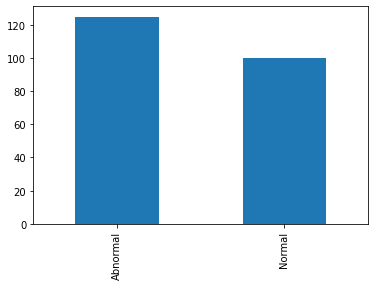

In [26]:
# Исследуем сбалансированность классов.
sample['class'].value_counts().plot(kind='bar')

In [27]:
# Все в порядке? 
# Ответ: no, as abnormal is bigger then normal

## Шаг 4: Выбросы

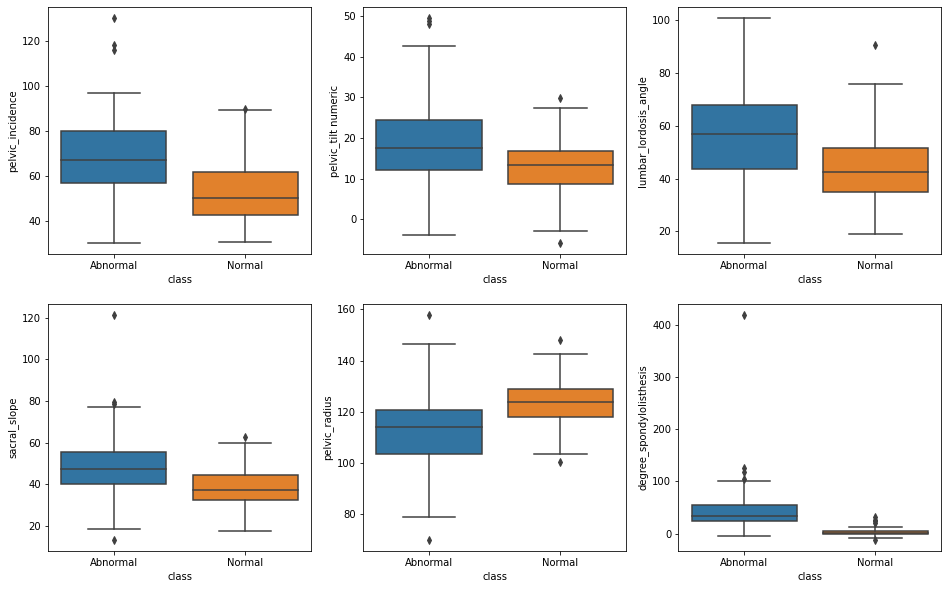

In [28]:
# Исследуем данные на выбросы.
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(16, 10))

for idx, feat in  enumerate(sample.columns[:6]):
    sns.boxplot(x='class', y=feat, data=sample, ax=axes[int(idx / 3), idx % 3])
    axes[int(idx / 3), idx % 3].set_xlabel('class')
    axes[int(idx / 3), idx % 3].set_ylabel(feat);

In [29]:
# Имееются ли выбросы?
# Ответ: yes

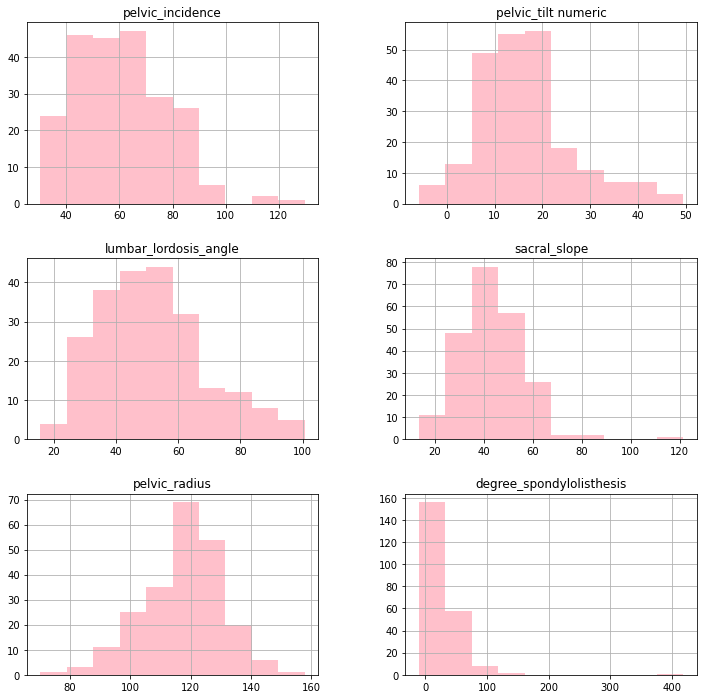

In [30]:
# Посмотрим на смещение данных. 
sample[sample.columns[:6]].hist(figsize=(12,12),color = 'pink');

In [31]:
# Какие признаки имеют смещение? Согласуются ли boxplot и histogram для признаки между собой?
# Ответ: degree_sponfylolisthesis,scale_slope,plevic_incidence,  Согласуются ли boxplot и histogram - almost

In [32]:
# Удалим выбросы, выступающие за границы 3 сигма
low = 0.01
high=.99
quant_data = sample.quantile([low, high])
for name in list(sample.drop(labels=['class'], axis=1).columns):
    sample = sample[(sample[name] > quant_data.loc[low, name]) & (sample[name] < quant_data.loc[high, name])]

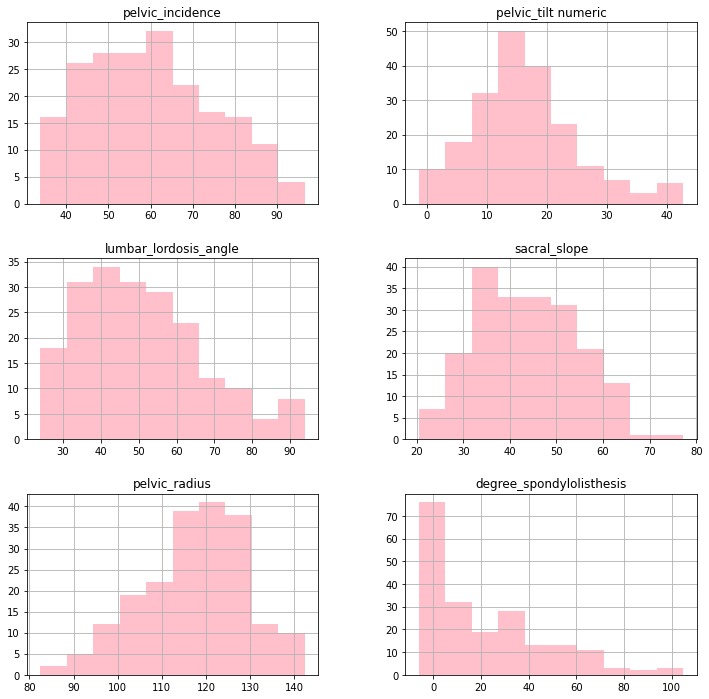

In [33]:
# Посмотрим на смещение данных теперь
sample[sample.columns[:6]].hist(figsize=(12,12),color = 'pink');

## Шаг 5: Scale

In [34]:
# Разделим таблицу на X и Y
X = data.drop(labels=['class'], axis=1)
Y = data['class']

# и на train и test  отношении 80/20 процентов
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2,random_state = 1)

In [35]:
# Проведем scaling данных
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_array = scaler.fit_transform(X_train)
X_train = pd.DataFrame(X_train_array, index=X_train.index, columns=X_train.columns)

X_test_array = scaler.fit_transform(X_test)
X_test = pd.DataFrame(X_test_array, index=X_test.index, columns=X_test.columns)

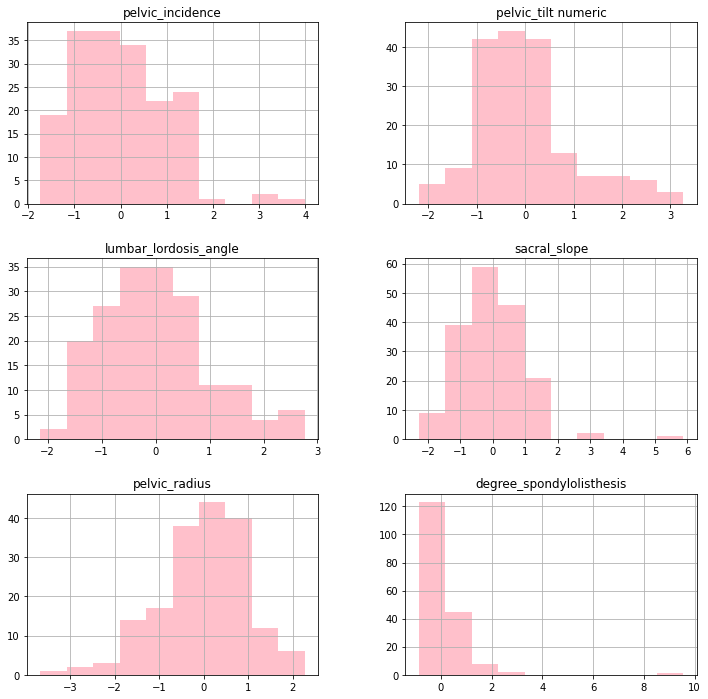

In [36]:
# Посмотрим на гистограммы признаков
X_train[X_train.columns[:6]].hist(figsize=(12,12),color = 'pink');

In [37]:
# Что изменилось?
# Ответ: degree_spondylolisthesis,sacral_slope, pelvic_indincec have changed and they have different min and Has for Ox, also some of representation of columns(features) became less biased

## Шаг 6: PCA

In [38]:
#pd.DataFrame(X_train)
#X_train.info()
value = sample.mean()
X_train = X_train.fillna(value)
X_test = X_test.fillna(value)

In [39]:
X_train.info()   # so we see there are no NAN anymore

<class 'pandas.core.frame.DataFrame'>
Int64Index: 180 entries, 85 to 37
Data columns (total 6 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   pelvic_incidence          180 non-null    float64
 1   pelvic_tilt numeric       180 non-null    float64
 2   lumbar_lordosis_angle     180 non-null    float64
 3   sacral_slope              180 non-null    float64
 4   pelvic_radius             180 non-null    float64
 5   degree_spondylolisthesis  180 non-null    float64
dtypes: float64(6)
memory usage: 9.8 KB


In [40]:

pd.DataFrame(X_train.isnull())

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis
85,False,False,False,False,False,False
28,False,False,False,False,False,False
16,False,False,False,False,False,False
114,False,False,False,False,False,False
122,False,False,False,False,False,False
...,...,...,...,...,...,...
203,False,False,False,False,False,False
137,False,False,False,False,False,False
72,False,False,False,False,False,False
140,False,False,False,False,False,False


In [41]:
# Создайте класс PCA для шести компонент и обучите на X_train
pca = PCA(n_components=6)
pca

PCA(n_components=6)

In [42]:
X_train_pca = pca.fit(X_train)
X_test_pca = pca.fit(X_test)

In [43]:
# Проведите трансформацию PCA

#pd.DataFrame(pca.transform(trainX))

#X_train_transform = pca.transform(X_train) 
#X_test_transform = pca.transform(X_test)  
#pd.DataFrame(X_train_transform)
#pd.DataFrame(X_test_transform)

X_tarin_pca = pd.DataFrame(pca.transform(X_train))
X_test_pca = pd.DataFrame(pca.transform(X_test))

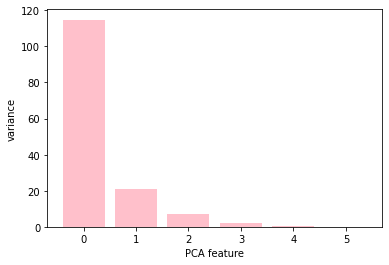

In [45]:
# Построим bar plot
#plt.bar(%%)
plt.bar(range(pca.n_components_), pca.explained_variance_,color='pink')
plt.xlabel('PCA feature')
plt.ylabel('variance')
plt.show()

In [46]:
# Переведем Y_train в числовые значения
d = dict(zip(set(Y_train), [0,1]))
label = list()
for i in Y_train:
    label.append(d[i])

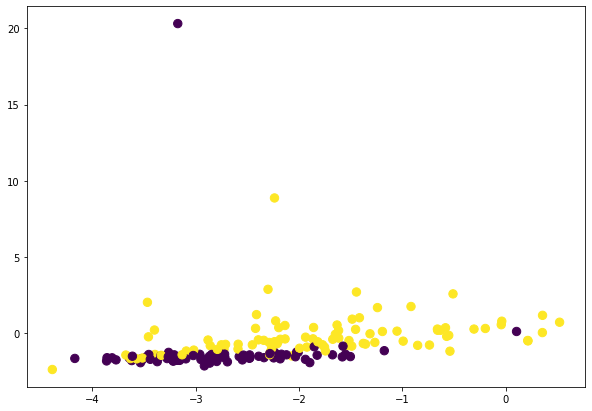

In [47]:
# И построим на двух компонентах
plt.figure(figsize=(10,7))
plt.scatter(X_tarin_pca.loc[:, 0], X_tarin_pca.loc[:, 1], c=label, s=70,cmap='viridis')
plt.show()
# i have used loc (~iloc) function to reduce problems with float64

Text(0.5, 1.0, 'ax[0,2] ')

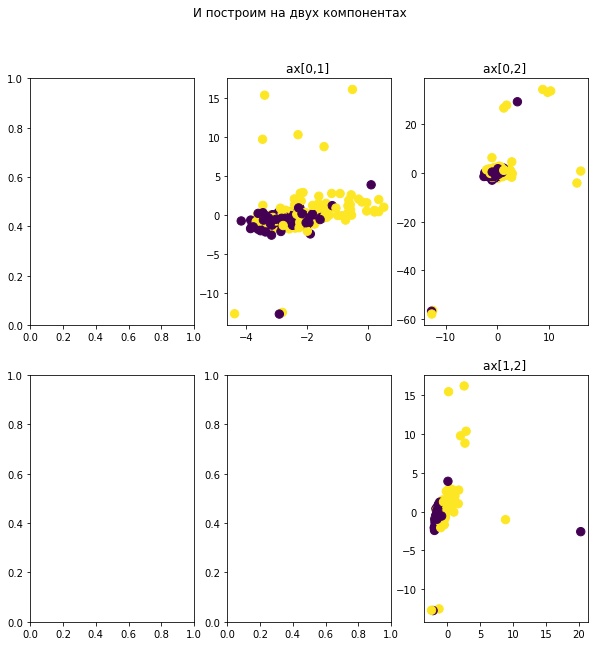

In [48]:
# Постойте попарно 1-2, 2-3, 1-3 компоненты  0-1 1-2 0-2
# И построим на двух компонентах

fig, ax=plt.subplots(nrows=2, ncols=3,figsize=(10,10))

fig.suptitle('И построим на двух компонентах')
ax[0,1].scatter(X_tarin_pca.loc[:, 0], X_tarin_pca.loc[:, 2], c=label, s=70, cmap='viridis')
ax[0,1].set_title('ax[0,1] ')

ax[1,2].scatter(X_tarin_pca.loc[:, 1], X_tarin_pca.loc[:, 2], c=label, s=70, cmap='viridis')
ax[1,2].set_title('ax[1,2] ')

ax[0,2].scatter(X_tarin_pca.loc[:, 2], X_tarin_pca.loc[:, 3], c=label, s=70, cmap='viridis')
ax[0,2].set_title('ax[0,2] ')

In [49]:
# Выведите, сколько компонент объясняют >95% variance

def correlation(dataset, threshold):
    col_corr = set() # Set of all the names of deleted columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if corr_matrix.iloc[i, j] >= threshold:
                colname = corr_matrix.columns[i] # getting the name of column
                col_corr.add(colname)
                if colname in dataset.columns:
                    del dataset[colname] # deleting the column from the dataset

    return dataset
    
X_filtered = correlation(X, 0.95)
col_filtered = X_filtered.columns
col_filtered


Index(['pelvic_incidence', 'pelvic_tilt numeric', 'lumbar_lordosis_angle',
       'sacral_slope', 'pelvic_radius', 'degree_spondylolisthesis'],
      dtype='object')

In [50]:
X_filtered.shape

(225, 6)